In [24]:
%matplotlib inline
import numpy as np
import random
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import entropy as scent
from matplotlib import gridspec
import matplotlib.image as mpimg

import collections

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#t_outs = test_dict['outputs']

#for t_i in range(t_outs.shape[0]): 
#    t_outs[t_i] = softmax(t_outs[t_i])
    
bins = np.load('human_bincounts.npy')
humans = bins / np.sum(bins, axis = 1)[:, np.newaxis]
humans_smoothed = (bins +1) / np.sum(bins, axis = 1)[:, np.newaxis]

ordered_filenames = np.load('decoded_test_filename_order.npy')

labels = ['P', 'A', 'B', 'C', 'De', 'Do', 'F', 'H', 'S', 'T']

im_dir = '/home/battleday/Academic/Berkeley/Superman/local/images/test_images_named'

In [34]:
mod_files = os.listdir('.')
print(mod_files)
mod_files = sorted([m for m in mod_files if m[-4:] == '.npz'])
print(mod_files)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', '.ipynb_checkpoints', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'entropy_fig-v1.ipynb', 'decoded_test_filename_order.npy', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'human_bincounts.npy', 'pyramidnet_basic_110_270.npz', 'test.png', 'entropy_fig_v2.ipynb']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'vgg_15_BN_64.npz', 'wrn_28_10.npz']


In [42]:
model_dict = collections.OrderedDict()
for m in mod_files:
    raw = np.load(m)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    model_dict[m.split('.')[0]] = raw_outs

[9304, 5482, 5042, 9414, 9643, 2061, 7765, 6361, 6750, 985]
addded rows: 8


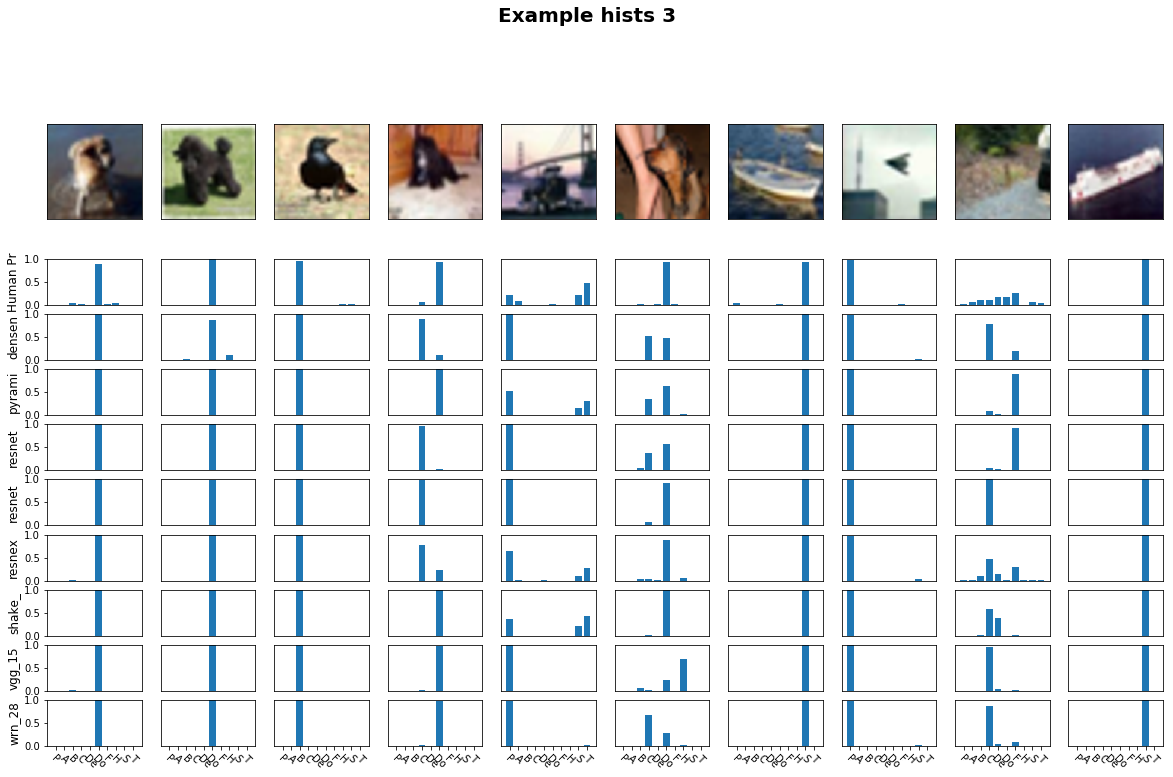

In [63]:
num_ims = 10
num_models = 8

#i = np.random.randint(10000)

sample = random.sample(range(0, 9999), num_ims)
print(sample)

added_rows = len(model_dict)
print('addded rows:', added_rows)
#model_dict = {'test': t_outs}

def fig_fn(title, save_path, ims, humans, model_dict,
           num_ims, added_rows, bolded_axes,
           base_rows = 3 + 1):
    """still a bunch of other things defined above
    that aren't in here.
    
    Model dict is ordered dict that includes humans"""
    
    fig = plt.figure(figsize=((num_ims) * 2, added_rows + base_rows)) 
    gs = gridspec.GridSpec(added_rows + base_rows, num_ims)
    
    fig.suptitle(title, fontsize = 20, fontweight='bold')
    
    for i in np.arange(num_ims):
        im = ims[i]
        ax_im_b = plt.subplot(gs[:3, i]) # size of im
        im_name_b = ordered_filenames[im]
        ax_im_b.xaxis.set_ticklabels([])
        ax_im_b.set_xticks([])
        ax_im_b.set_yticks([])
        #ax_im_b.set_title(labels[0], fontsize = 12)
        ax_im_b.yaxis.set_ticklabels([])
        img_b = mpimg.imread(im_dir + '/' + im_name_b)
        #ax_im_b.set_title('High certainty image', fontsize = 20)
        ax_im_b.imshow(img_b)


        im_guesses = humans[im]
        #print(im_guesses)
        ax_hist_b = plt.subplot(gs[3, i])
        ax_hist_b.bar(np.arange(10), im_guesses) #, align = 'left')
        ax_hist_b.set_xlim([-1, 10])
        ax_hist_b.set_ylim([0, 1]) 

        if ax_hist_b.is_first_col():
            if 0 in bolded_axes:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12, fontweight = 'bold')
            else:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12)
        
        else:
            ax_hist_b.yaxis.set_ticks([])

        ax_hist_b.xaxis.set_ticks([])

        for e, (key, value) in enumerate(model_dict.items()):
            im_guesses = value[im]
            #print(im_guesses)
            ax_hist_n = plt.subplot(gs[base_rows + (e), i])
            ax_hist_n.bar(np.arange(10), im_guesses) #, align = 'left')
            ax_hist_n.set_xlim([-1, 10])
            ax_hist_n.set_ylim([0, 1]) 

            if ax_hist_n.is_first_col():
                if (e + 1) in bolded_axes:
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12, fontweight = 'bold') 
                else: 
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12) 
                        # set to count
            else:
                ax_hist_n.yaxis.set_ticks([])
            ax_hist_n.xaxis.set_ticks([])

            if ax_hist_n.is_last_row():
                ax_hist_n.xaxis.set_ticks(np.arange(num_ims))
                ax_hist_n.xaxis.set_ticklabels(labels)
        
        plt.xticks(rotation = -45, ha='center')

    plt.savefig(save_path + '/' + title + '.png')

fig_fn('Example hists {0}'.format(np.random.randint(20)), 'figs', sample, humans, model_dict, num_ims, added_rows, [])


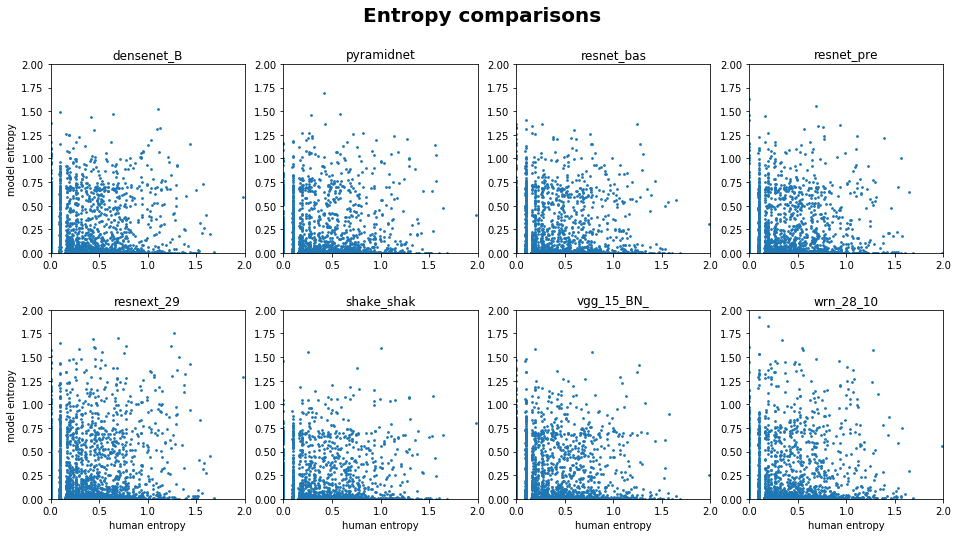

In [62]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 4)
    
fig.suptitle('Entropy comparisons', fontsize = 20, fontweight='bold')
for e, (key, value) in enumerate(model_dict.items()):
    r, c = np.unravel_index(e, (2, 4))
   
    ax = plt.subplot(gs[r, c])
    
    ax.scatter(scent(humans.T), scent(value.T), s=3)
    ax.set_title(key[:10])
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    if ax.is_last_row():
        ax.set_xlabel('human entropy')
    
    if ax.is_first_col():
        ax.set_ylabel('model entropy')

fig.subplots_adjust(hspace=.3)
plt.savefig('figs/Basic entropy comparisons.png')